In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import os
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

In [116]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-dark-palette')
plt.rcParams["mathtext.fontset"] = "cm"

# R2 and MSE plot

In [62]:
data = pd.read_csv('../dataset/radar_narr_combine.csv')
result = pd.read_csv('../dataset/result_mean_depth.csv')
lat_lon = data[['radar_id', 'lat', 'lon']]
lat_lon.drop_duplicates(['radar_id', 'lat', 'lon'], keep = 'first', inplace = True)
lat_lon.set_index('radar_id', inplace = True)
result.set_index('radar', inplace = True)
lat_lon['r2'] = result['r2']
lat_lon['mse'] = result['mse']
loc = lat_lon['r2'][lat_lon['r2']<0].index.tolist()
for i in loc:
    lat_lon.loc[i, 'r2'] = 0

<ipython-input-62-6135a5e26829>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lon.drop_duplicates(['radar_id', 'lat', 'lon'], keep = 'first', inplace = True)
<ipython-input-62-6135a5e26829>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lon['r2'] = result['r2']
<ipython-input-62-6135a5e26829>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [63]:
lat_min = min(lat_lon['lat'])
lat_max = max(lat_lon['lat'])
lon_min = min(lat_lon['lon'])
lon_max = max(lat_lon['lon'])

In [113]:
def map_plot(data, lat_min, lat_max, lon_min, lon_max, name):
    data.dropna()
    fig = plt.figure(figsize = (12, 6))
    earth = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max)
    earth.drawcountries()
    earth.bluemarble(alpha=0.42)
    earth.drawcoastlines(color='black', linewidth=1)
    cm = plt.cm.get_cmap('Accent')
    earth.scatter(data['lon'], data['lat'],c = data.iloc[:,2], cmap = 'rainbow')
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    
    #fig.subplots_adjust(right=0.5)
    cmap = 'rainbow'
    norm = mpl.colors.Normalize(vmin=min(data.iloc[:,2]), vmax=max(data.iloc[:,2]))
    ax = fig.add_axes([0.92, 0.14, 0.02, 0.72])
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='vertical')

    plt.savefig('../figures/%s.png'%name, dpi=350, bbox_inches='tight')
    plt.show()

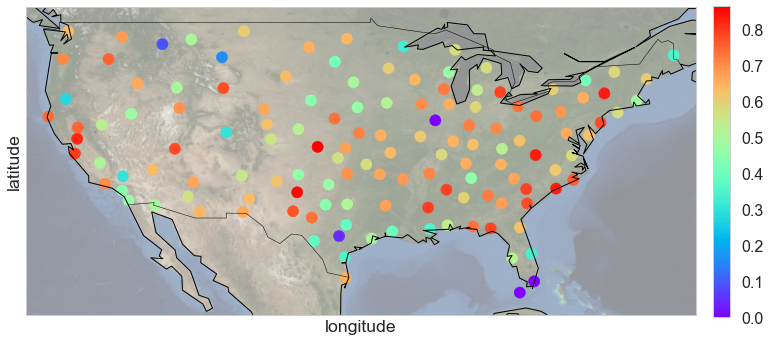

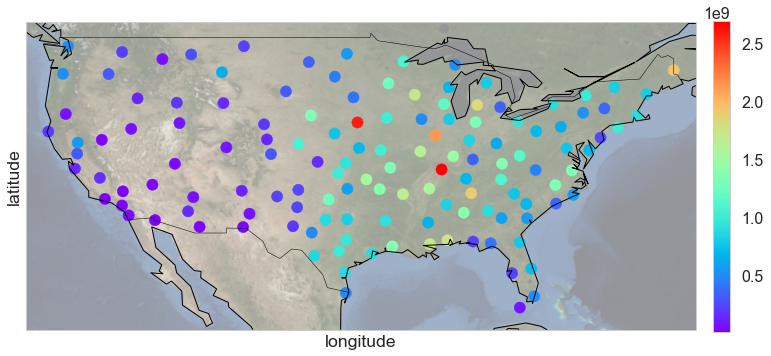

In [114]:
map_plot(lat_lon[['lat', 'lon', 'r2']], lat_min-2, lat_max+2, lon_min-2, lon_max+2, 'r2')
map_plot(lat_lon[['lat', 'lon', 'mse']], lat_min-2, lat_max+2, lon_min-2, lon_max+2, 'mse')